# Working with existing deployments

In [3]:
from skil import Skil, Service
from skil import get_workspace_by_id
from skil import get_experiment_by_id
from skil import get_model_by_id
from skil import get_deployment_by_id

skil_server = Skil(
    host='localhost',
    port=9008,
    user_id='admin',
    password='Skymind'
)

Using TensorFlow backend.


'>>> Authenticating SKIL...'
'>>> Done!'


In [4]:
workspace_id  = '3147de1f-ca0c-4857-a6f0-16ad8aee0426'
experiment_id = 'mnist-experiment-01'
model_id      = 'mnist-model-01'
deployment_id = '0'

In [5]:
work_space = get_workspace_by_id(skil_server, workspace_id)

experiment = get_experiment_by_id(work_space, experiment_id)

deployment = get_deployment_by_id(skil_server, deployment_id)

model      = get_model_by_id(experiment, model_id)

In [6]:
service = Service(
    skil=skil_server,
    model=model,
    deployment=deployment,
    model_deployment=None
)

## Prediction

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

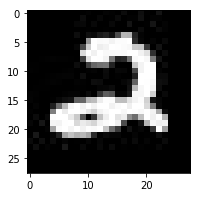

In [19]:
image = cv2.imread("mnist.jpg", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(3,3))
plt.imshow(image, cmap="gray")
plt.show()

In [20]:
image = np.squeeze(image.reshape(1,-1))
image.shape

(784,)

In [21]:
predicted = service.predict_single(image)
print('Predicted:',predicted)
print('Target Class:',np.argmax(predicted))

Predicted: [[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]]
Target Class: 2
